Исследование для игры «Мемтрис»
====

Данные
---
- user_id — уникальный идентификатор пользователя    ;
- game_id — уникальный идентификатор игр    ы;
- round — уровень иг    ры;
- compactor — наличие уплотнит    еля;
- win — победа (1) или проигрыш     (0);
- game_mode — стиль игры, hard или easy: выяснила у разработчиков, что в режиме easy игроки видят, какая фигура выпадет следующей, а в режиме hard — нет.

Проблема
---
Игроки жалуются, что уплотнитель даёт слишком большое преимущество купившим его игрокам.


Гипотеза
---
Процент побед у применяющих уплотнитель игроков выше, чем у игроков без уплотнителя.

In [8]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# чтение файла
games = pd.read_csv('game_data.csv')
games

,user_id,game_id,round,compactor,win,game_mode
0,3b7b1851-8fa1-43dd-9b40-76d37d085142,ec5a82a0-c106-40b7-acbf-0b90f3bf7333,2,False,0,hard
1,5e333a91-62d5-4c07-b017-25bdee9bd158,d9a513ee-be8f-4025-81a1-4f8c06bf652e,2,False,1,easy
2,00f7430f-f4aa-4bee-83f0-21ea6ac34dd6,87c83edb-9cb0-4280-9417-2763b39b44c5,3,True,1,hard
3,cc379bf3-2381-4ec4-81cb-87d823f94642,27fd0dba-424a-4a07-9959-0d584c2fb40f,3,False,1,hard
4,dbca4926-2dda-4993-b639-5485a1a3c93a,46ff0dba-0145-40e7-bd83-66618b728661,2,False,0,hard
...,...,...,...,...,...,...
475,ba1d304c-e2b4-486b-9617-cbddbe183420,5c0f134a-a077-4606-8bae-171f1072e1b0,2,False,0,hard
476,6889922c-909d-4a5f-9b52-236df037bc0f,e385fc6d-659a-456b-af7c-b03404175627,4,False,1,easy
477,2f85e0b8-0157-4bd2-a3a2-c144bfabc8b3,c8461d27-cae7-4439-8f30-82f042e751fc,3,True,1,hard
478,99f35a3d-e144-47a4-9940-bd792338afd5,71afffdb-cf03-434c-bfc2-ce6080e33ce8,5,False,0,hard


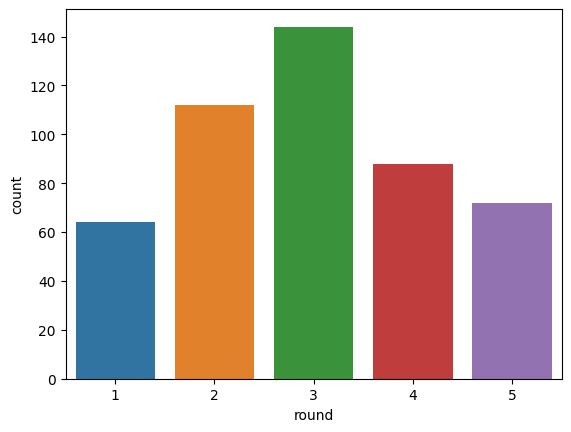

In [10]:
sns.countplot(x='round', data=games);

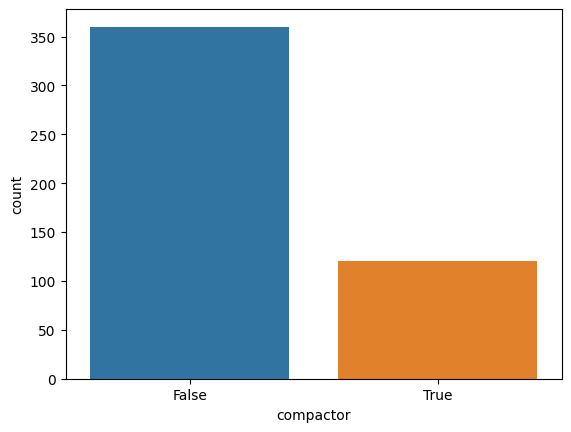

In [11]:
sns.countplot(x='compactor', data=games);

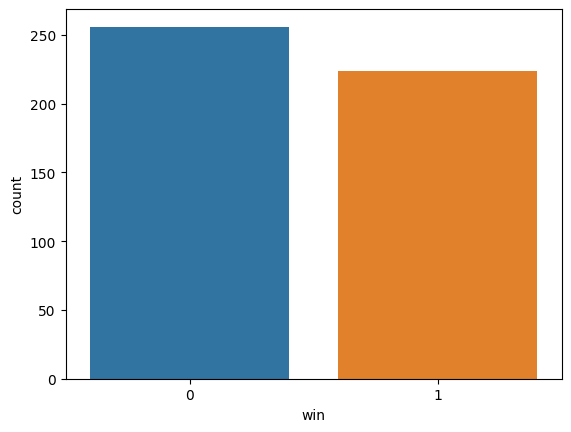

In [12]:
sns.countplot(x='win', data=games);

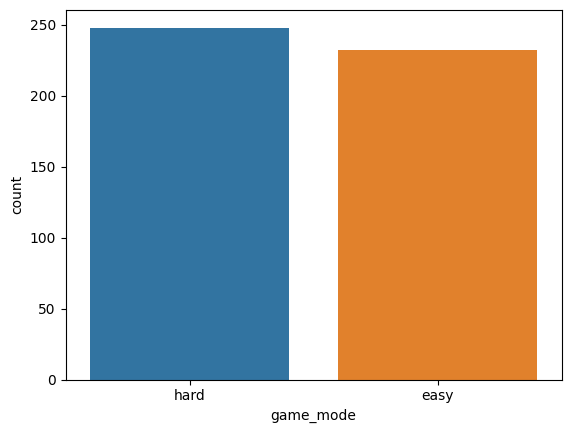

In [13]:
sns.countplot(x='game_mode', data=games);

In [26]:
games_compactor_on = games[games['compactor'] == True]
games_compactor_off = games[games['compactor'] == False]

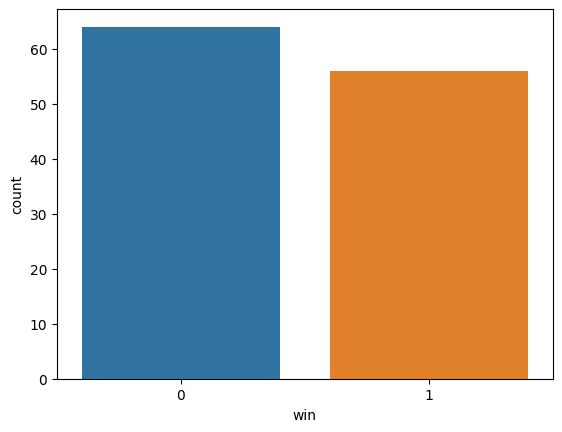

In [28]:
# Игры с уплотнителем:
sns.countplot(x='win', data = games_compactor_on);

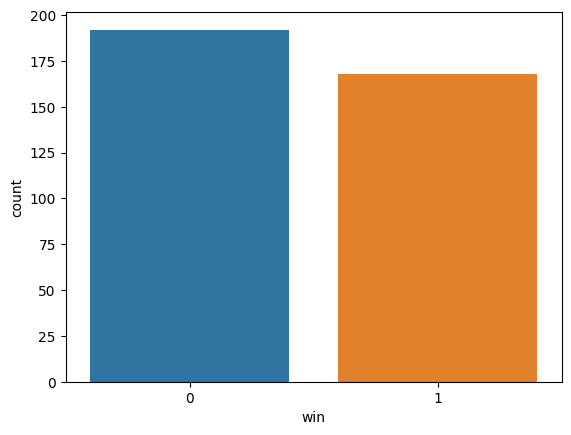

In [29]:
# Игры без уплотнителя:
sns.countplot(x='win', data = games_compactor_off);

In [30]:
def get_wins_percent(data):
    return int(round(data['win'].mean() * 100))

print('Выигрышей с уплотнителем:', get_wins_percent(games_compactor_on), '%')
print('Выигрышей без уплотнителя:', get_wins_percent(games_compactor_off), '%')

Выигрышей с уплотнителем: 47 %
Выигрышей без уплотнителя: 47 %


Доля побед в играх с уплотнителем действительно больше. При этом нельзя утверждать, что наличие уплотнителя влияет на исход игры. Например, может быть так, что уплотнитель покупают более сильные игроки — у них и без уплотнителя процент побед будет больше. Или наоборот: уплотнитель покупают на начальных уровнях игры, где процент побед может быть выше сам по себе.

Можно было бы выбрать определённого игрока и посмотреть, как часто этот игрок побеждает без уплотнителя и с уплотнителем. К сожалению, так сделать не выйдет: каждая игра в таблице связана с новым игроком. Это можно понять из следующей команды:

In [31]:
len(set(games['user_id']))

60

Число уникальных игроков совпадает с количеством строк в датасете.

Что можно сделать?

Рассмотреть различные срезы: по раундам, по game_mode. Проверить, действительно ли уплотнитель положительно влияет на каждый из срезов. Если это так, то гипотеза о том, что уплотнитель становится причиной побед, набирает некоторую силу. Хотя сказать наверняка, что нет никакой скрытой причины, которая приводит и к победе, и к покупке уплотнителя, мы по-прежнему не сможем. Например, в игре может быть какой-нибудь баг, который приводит к автоматической покупке уплотнителя в момент победы.

Влияние уплотнителя в разных раундах
=====================================

In [32]:
for game_round in [1, 2, 3, 4, 5]:
    print('Round', game_round)
    print('Выигрышей с уплотнителем:', 
          get_wins_percent(games_compactor_on[games_compactor_on['round'] == game_round]),
          '%')
    print('Выигрышей без уплотнителя:',
          get_wins_percent(games_compactor_off[games_compactor_off['round'] == game_round]),
          '%')
    print()

Round 1
Выигрышей с уплотнителем: 100 %
Выигрышей без уплотнителя: 67 %

Round 2
Выигрышей с уплотнителем: 0 %
Выигрышей без уплотнителя: 54 %

Round 3
Выигрышей с уплотнителем: 67 %
Выигрышей без уплотнителя: 25 %

Round 4
Выигрышей с уплотнителем: 50 %
Выигрышей без уплотнителя: 67 %

Round 5
Выигрышей с уплотнителем: 0 %
Выигрышей без уплотнителя: 20 %



На первом, втором и пятом уровнях наличие уплотнителя связано с бóльшим количеством поражений, в то время как для на третьем и четвёртом — с бóльшим количеством побед.

Влияние уплотнителя в разных режимах игры
-----------------------------------------

In [33]:
for game_mode in ['hard', 'easy']:
    print('Mode', game_mode)
    print('Доля выигрышей с уплотнителем:',
          get_wins_percent(games_compactor_on[games_compactor_on['game_mode'] == game_mode]),
          '%')
    print('Доля выигрышей без уплотнителя:',
          get_wins_percent(games_compactor_off[games_compactor_off['game_mode'] == game_mode]),
          '%')
    print()

Mode hard
Доля выигрышей с уплотнителем: 38 %
Доля выигрышей без уплотнителя: 35 %

Mode easy
Доля выигрышей с уплотнителем: 57 %
Доля выигрышей без уплотнителя: 59 %



В режиме hard наличие уплотнителя связано с очень большой долей побед.

А вот в режиме easy уплотнитель даже несколько ухудшает результат.

Выводы
======

Наличие уплотнителя в среднем связано с бóльшим количеством побед: 63% против 55%.

При этом для некоторых уровней или режимов игры его влияние неоднозначно: на 1-м, 2-м и 5-м уровнях применяющие уплотнитель игроки одерживают даже меньше побед, чем игроки без уплотнителя. Сильнее всего влияние уплотнителя заметно в играх режима hard: там уплотнитель приводит к 73% победам против 54% при игре без уплотнителя.

Такая значительная разница говорит о том, что жалобы игроков обоснованы.

Уплотнитель заметно влияет на баланс игры, но только в режиме hard или на 3-м и 4-м уровнях игры.